***Парсинг файлов и создание датасета***

In [1]:
# import os
# import pandas as pd
# import re
# from collections import Counter
# def get_folder():
#     dir = r'Src'
#     return [folder for folder in os.listdir(dir) if os.path.isdir(os.path.join(dir, folder))]

# def create_dataframe(folder_list):
#     directory = r'Src'
#     data = []
#     skipped_files = 0

#     for folder in folder_list:
#         file_path = os.path.join(directory, folder)
#         files = os.listdir(file_path)

#         for file in files:
#             lang_data = {
#                 'language': folder,
#                 'file_name': file,
#                 'file_extension': os.path.splitext(file)[1].lower(),
#                 'file_content': '',
#                 'keywords': '',
#                 'symbols': '',
#                 'line_count': '',
#                 'character_count': '',
#             }
#             data.append(lang_data)

#             try:
#                 with open(os.path.join(file_path, file), 'r', encoding='utf-8') as f:
#                     lang_data['file_content'] = f.read()

#                 if not lang_data['file_content']:
#                     skipped_files += 1
#                     continue

#                 keywords = extract_keyword(lang_data['file_content'])
#                 lang_data['keywords'] = keywords

#                 symbols = extract_symbol(lang_data['file_content'])
#                 lang_data['symbols'] = symbols

#                 lines = lang_data['file_content'].split('\n')
#                 lang_data['line_count'] = len(lines)
#                 lang_data['character_count'] = len(lang_data['file_content'])
#             except Exception as e:
#                 print(f"Ошибка при обработке файла {file}: {str(e)}")

#     df = pd.DataFrame(data)
#     return df

# def extract_symbol(text):
#     special_chars = r'!@#$%^&*()_+\-=\[\]{};:"<>,.?/~'
#     char_freq = Counter(char for char in text if char in special_chars)
#     max_freq = max(char_freq.values(), default=0)
#     top_symbol = next((char for char, freq in char_freq.items() if freq == max_freq), None)
#     return top_symbol if top_symbol else ''
# def extract_keyword(text):
#     cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
#     words = cleaned_text.split()
#     word_freq = Counter(words)
#     max_freq = max(word_freq.values(), default=0)
#     top_word = next((word for word, freq in word_freq.items() if freq == max_freq), '')
#     return top_word if top_word else ''

# folders = get_folder()
# df = create_dataframe(folders)
# df.to_csv('rd.csv', encoding='UTF-8')

**Подключение библиотек, анализ датасета**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('rd.csv')
print(data.info())
print(f"Количество дубликатов: {data.duplicated().sum()} ")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23176 entries, 0 to 23175
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23176 non-null  int64  
 1   language         23176 non-null  object 
 2   file_name        23176 non-null  object 
 3   file_extension   23176 non-null  object 
 4   file_content     23166 non-null  object 
 5   keywords         23130 non-null  object 
 6   symbols          23062 non-null  object 
 7   line_count       23166 non-null  float64
 8   character_count  23166 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB
None
Количество дубликатов: 0 


,Unnamed: 0,language,file_name,file_extension,file_content,keywords,symbols,line_count,character_count
0,0,Ada,100-doors-1.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...,loop,_,23.0,656.0
1,1,Ada,100-doors-2.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n with Ada....,num,;,17.0,425.0
2,2,Ada,24-game.ada,.ada,with Ada.Text_IO;\nwith Ada.Numerics.Discrete_...,i,_,84.0,2927.0
3,3,Ada,99-bottles-of-beer-1.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...,bottles,;,13.0,388.0
4,4,Ada,99-bottles-of-beer-2.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n\nprocedur...,end,;,40.0,1162.0


**Предобработка**

In [3]:
columns_to_remove = ['Unnamed: 0']
data = data.drop(columns=columns_to_remove)
data['file_content'] = data['file_content'].fillna('')
df = data.copy()
data.head(3)

,language,file_name,file_extension,file_content,keywords,symbols,line_count,character_count
0,Ada,100-doors-1.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...,loop,_,23.0,656.0
1,Ada,100-doors-2.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n with Ada....,num,;,17.0,425.0
2,Ada,24-game.ada,.ada,with Ada.Text_IO;\nwith Ada.Numerics.Discrete_...,i,_,84.0,2927.0


**Подключение библиотек для обучения**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

**Обучение с методом Bag of Words**

In [5]:
feature = data.drop('language', axis=1)
target = data['language']

columns_to_remove = ['file_name', 'file_extension']
feature = data.drop(columns=columns_to_remove)

count_vectorizer = CountVectorizer(max_features=5000)
feature = count_vectorizer.fit_transform(feature['file_content'])
# print(feature.toarray)


x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
print('\nLogisticRegression:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print('\nDecisionTreeClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'confusion_matrix: \n {confusion_matrix(y_test, y_pred)}')

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('\nRandomForestClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')


LogisticRegression:

Accuracy: 0.8546
Precision: 0.8590
Recall: 0.8546
F1 score: 0.8551

DecisionTreeClassifier:

Accuracy: 0.7959
Precision: 0.8014
Recall: 0.7959
F1 score: 0.7956

RandomForestClassifier:

Accuracy: 0.8736
Precision: 0.8783
Recall: 0.8736
F1 score: 0.8740


Здесь мы использовали count_vectorizer, который реализует концепцию Bag of Words. BoW - это простой и эффективный способ представления текста в числовом формате.А именно преобразование слов в числа:
Каждое слово в тексте заменяется на его индекс в словаре слов.
Создание матрицы:
Каждая строка матрицы представляет отдельный документ.
Столбцы представляют слова в словаре.
Значения в матрице показывают частоту появления каждого слова в документе.


**Визуализация**

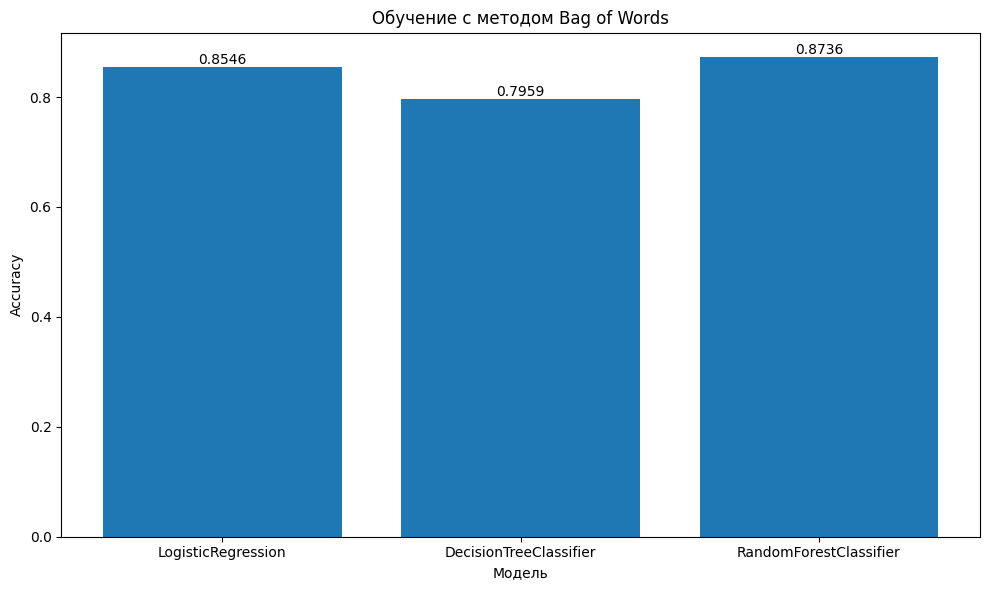

In [6]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
accuracies = [
    accuracy_score(y_test, y_pred) for _, y_pred, _ in
    [(logr, logr.predict(x_test), 'LogisticRegression'),
     (dtc, dtc.predict(x_test), 'DecisionTreeClassifier'),
     (rfc, rfc.predict(x_test), 'RandomForestClassifier')]
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.title('Обучение с методом Bag of Words')

for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Обучение с методом tfidf**

In [7]:
df['file_content'] = df['file_content'].fillna('')
feature = df.drop('language', axis=1)
target = df['language']

columns_to_remove = ['file_name', 'file_extension']
feature = df.drop(columns=columns_to_remove)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
feature = tfidf_vectorizer.fit_transform(feature['file_content'])
# print(feature.toarray())

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
print('\nLogisticRegression:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print('\nDecisionTreeClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('\nRandomForestClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')


LogisticRegression:

Accuracy: 0.8466
Precision: 0.8590
Recall: 0.8466
F1 score: 0.8484

DecisionTreeClassifier:

Accuracy: 0.7916
Precision: 0.7965
Recall: 0.7916
F1 score: 0.7917

RandomForestClassifier:

Accuracy: 0.8807
Precision: 0.8865
Recall: 0.8807
F1 score: 0.8814


Здесь мы использовали TfidfVectorizer - это класс, который используется для преобразования текстовых данных в матрицу TF-IDF векторов. А max_features=5000 ограничивает количество наиболее важных слов (токенов) в векторах, оставляя только 5000 наиболее часто встречающихся слов.

TF (Term Frequency): Подсчет количества раз, когда слово встречается в документе.
IDF (Inverse Document Frequency): Вычисление rarity слова во всем наборе данных.
TF-IDF: Суммирование TF и IDF дает окончательный вес слова для каждого документа.

feature = tfidf_vectorizer.fit_transform(feature['file_content'])
Здесь происходит основная работа TfidfVectorizer:
fit: Проанализирует входные данные (feature['file_content']) и вычислит частоту встречаемости слов (TF).
transform: Использует результаты fit для вычисления TF-IDF весов для каждого слова во всем наборе данных.
Результатом будет матрица, где каждая строка представляет документ, а столбцы - отдельные слова или токены.

Главное отличие от BoW. TF-IDF расширяет модель BoW, учитывая как частоту появления слова в документе(TF), так и ее редкость во всем документе (IDF)

**Визуализация**

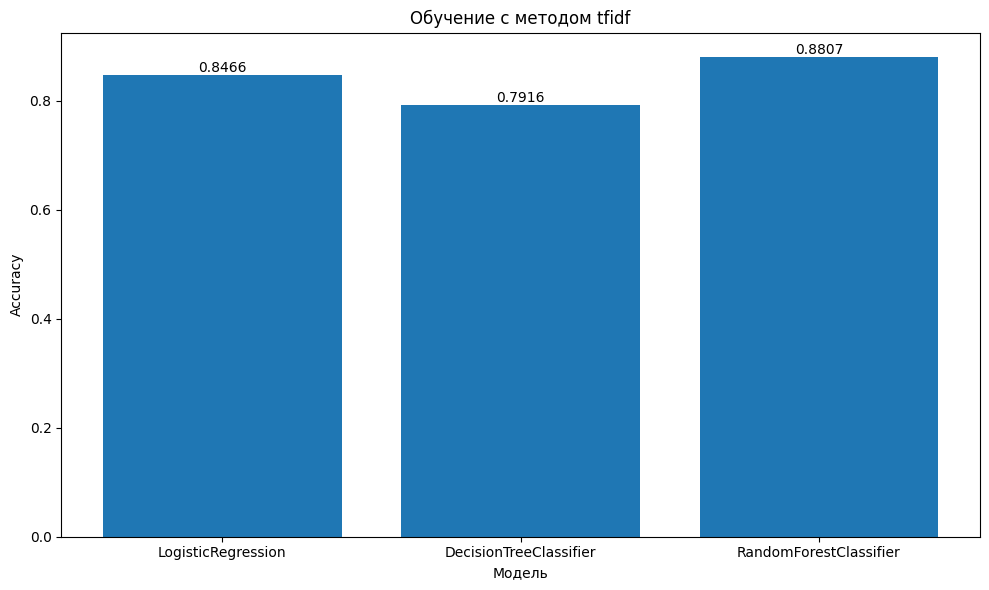

In [8]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
accuracies = [
    accuracy_score(y_test, y_pred) for _, y_pred, _ in
    [(logr, logr.predict(x_test), 'LogisticRegression'),
     (dtc, dtc.predict(x_test), 'DecisionTreeClassifier'),
     (rfc, rfc.predict(x_test), 'RandomForestClassifier')]
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.title('Обучение с методом tfidf')

for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Тест наших моделей**

In [9]:
test_1 = '''
import os
import pandas as pd
import re
from collections import Counter
from collections import defaultdict

def get_folder():
      dir = r'Src'
     return [folder for folder in os.listdir(dir) if os.path.isdir(os.path.join(dir, folder))]
 def tokenize_text(text):
     tokens = re.findall(r'\w+', text.lower())
     token_freq = defaultdict(int)
     for token in tokens:
         token_freq[token] += 1
     return dict(token_freq)
'''
test_2 = '''
#include <iostream>
using namespace std;
int main() {
    cout << "Hello, world";
    return 0;
}
'''
test_3 = '''
package main [1](https://skillbox.ru/media/code/yazyk_go_chto_pod_kapotom_i_zachem_programmistu_uchit_ego_kak_vtoroy/)
import "fmt" [1](https://skillbox.ru/media/code/yazyk_go_chto_pod_kapotom_i_zachem_programmistu_uchit_ego_kak_vtoroy/)
func main() {
  fmt.Println("Hello, World!") [1](https://skillbox.ru/media/code/yazyk_go_chto_pod_kapotom_i_zachem_programmistu_uchit_ego_kak_vtoroy/)
}

'''
test_4 = '''
console.log('Hello, World!');
function calculate(operation, num1, num2) {
  switch(operation) {
    case 'add':
      return num1 + num2;
    case 'sub':
      return num1 - num2;
    case 'mul':
      return num1 * num2;
    case 'div':
      return num1 / num2;
  }
}
'''
texts_to_classify = [test_1, test_2, test_3, test_4]
predictions_rfc = []
predictions_logr = []

for text in texts_to_classify:
    X_count = count_vectorizer.transform([text])
    pred_rfc = rfc.predict(X_count)[0]
    predictions_rfc.append(pred_rfc)

    X_tfidf = tfidf_vectorizer.transform([text])
    pred_logr = logr.predict(X_tfidf)[0]
    predictions_logr.append(pred_logr)


print("Prediction for text_1:")
print("  RFC:", predictions_rfc[0])
print("  LogR:", predictions_logr[0])


print("\nPrediction for text_2:")
print("  RFC:", predictions_rfc[1])
print("  LogR:", predictions_logr[1])

print("Prediction for text_3:")
print("  RFC:", predictions_rfc[2])
print("  LogR:", predictions_logr[2])


print("\nPrediction for text_4:")
print("  RFC:", predictions_rfc[3])
print("  LogR:", predictions_logr[3])

Prediction for text_1:
  RFC: Python
  LogR: Python

Prediction for text_2:
  RFC: C++
  LogR: C++
Prediction for text_3:
  RFC: Go
  LogR: Go

Prediction for text_4:
  RFC: JavaScript
  LogR: JavaScript


**Вывод**

Данная лабораторная работа охватывает все ключевые этапы процесса машинного обучения. От парсинга исходных данных до тестирования моделей. Работа влключает в себя использование различных методов представления текста, включая Bag of Words и TF-IDF, что позволило увидеть их эффективность в задаче классификации.

Результат лабораторной работы предоставляют ценный опыт и знания о том, как различные методы обработки текста влияют на результаты машинного обучения. Сравнение BOW и TF-IDF моделей дает важные выводы о том, какие методы могут быть более эффективными для конкретных задач классификации.